In [1]:
import soundfile
import matplotlib.pyplot as plt

### Get equalizer coefs

#### Read files

In [2]:
sweeper_original = soundfile.read('data/sweeper_original.wav')
sweeper_wardrope = soundfile.read('data/sweeper_wardrope.wav')
sweeper_speaker = soundfile.read('data/sweeper_speaker.wav')

#### Get equalizer coefs 

In [3]:
from dsp.equalizer import *

In [4]:
eqaulizer_coefs, bands = get_equalizer(sweeper_original, sweeper_speaker, num_bands=128)

/home/nadezhda/dsp/dsp/equalizer.py:26: RuntimeWarning: Mean of empty slice.
  mean_speaker[i] = fft_speaker[(freqs_speaker < bands[i]) & ((freqs_speaker > bands[i-1]))].mean()
/home/nadezhda/miniconda3/envs/dsp_hw/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/nadezhda/dsp/dsp/equalizer.py:28: RuntimeWarning: invalid value encountered in divide
  eqaulizer_coefs = mean_speaker / mean_original


#### Check equalizer with sweeper

In [5]:
equal_signal = apply_equaizer(sweeper_speaker, eqaulizer_coefs, bands)

In [20]:
freq_or = fftfreq(len(sweeper_original[0]), 1/sweeper_original[1])
freqs_sp = fftfreq(len(sweeper_speaker[0]), 1/sweeper_speaker[1])
fft_eq = fftfreq(len(equal_signal), 1/sweeper_speaker[1])

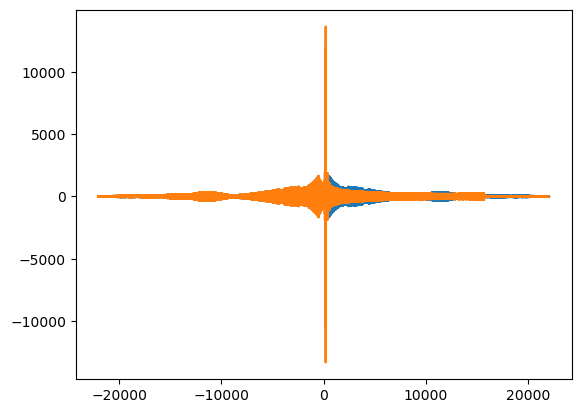

In [25]:
# plt.plot(freq_or, fft(sweeper_original[0]))
plt.plot(freqs_sp, fft(sweeper_speaker[0]))
plt.plot(fft_eq, fft(equal_signal))

### Apply equalizer to white noise 

In [7]:
white_noise = soundfile.read('data/370830__deleted_user_5959249__white-noise.wav')

In [26]:
white_noise_equalized = apply_equaizer(white_noise, eqaulizer_coefs, bands)

/home/nadezhda/dsp/dsp/equalizer.py:39: RuntimeWarning: invalid value encountered in divide
  fft_speaker[(freqs_speaker < bands[i]) & ((freqs_speaker > bands[i-1]))] /= equalizer_coefs[i]


In [37]:
white_noise_equalized.real

array([[ 0.19332886,  0.19720459],
       [-0.7727356 ,  0.0864563 ],
       [ 0.30047607,  0.93988037],
       ...,
       [ 0.50564575,  0.50790405],
       [ 0.37228394, -0.12661743],
       [ 0.60202026, -0.19692993]])

In [38]:
soundfile.write('data/equalized_white_noise.wav', white_noise_equalized.real,  48000, )